In [ ]:
import requests
import pandas as pd
import time

cities = {
    "Austin, TX": (30.27, -97.74),
    "Miami, FL": (25.76, -80.19),
    "Seattle, WA": (47.61, -122.33),
    "Denver, CO": (39.74, -104.99),
    "Boston, MA": (42.36, -71.06),
    "Phoenix, AZ": (33.45, -112.07),
    "Chicago, IL": (41.88, -87.63),
    "Portland, OR": (45.52, -122.68),
    "Nashville, TN": (36.16, -86.78),
    "San Diego, CA": (32.72, -117.16)
}


start_date = "2022-01-01"
end_date = "2023-12-31"

all_data = []

# Fetch data for each city
for i, (city, coords) in enumerate(cities.items(), 1):
    lat, lon = coords
    print(f"[{i}/{len(cities)}] Fetching data for {city}...")

    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum,relative_humidity_2m_mean",
        "temperature_unit": "fahrenheit",
        "timezone": "America/New_York"
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        daily = data['daily']

        df = pd.DataFrame({
            'date': daily['time'],
            'temp_max': daily['temperature_2m_max'],
            'temp_min': daily['temperature_2m_min'],
            'precipitation': daily['precipitation_sum'],
            'humidity': daily['relative_humidity_2m_mean']
        })
        df['city'] = city
        all_data.append(df)
        print(f" Got {len(df)} days")
    else:
        print(f" Failed: {response.status_code}")

    time.sleep(1)

# Combine all data
if len(all_data) > 0:
    weather_df = pd.concat(all_data, ignore_index=True)

    # Rename columns
    weather_df.columns = ['Date', 'Temp_High', 'Temp_Low', 'Precipitation', 'Humidity', 'City']

    # Reorder columns
    weather_df = weather_df[['City', 'Date', 'Temp_High', 'Temp_Low', 'Precipitation', 'Humidity']]

    print(f"\n Total rows: {len(weather_df)}")
    print(f"Cities: {weather_df['City'].nunique()}")
    print(f"Date range: {weather_df['Date'].min()} to {weather_df['Date'].max()}")

    display(weather_df.head(10))
else:
    print("\n No data collected")

[1/10] Fetching data for Austin, TX...
 Got 730 days
[2/10] Fetching data for Miami, FL...
 Got 730 days
[3/10] Fetching data for Seattle, WA...
 Got 730 days
[4/10] Fetching data for Denver, CO...
 Got 730 days
[5/10] Fetching data for Boston, MA...
 Got 730 days
[6/10] Fetching data for Phoenix, AZ...
 Got 730 days
[7/10] Fetching data for Chicago, IL...
 Got 730 days
[8/10] Fetching data for Portland, OR...
 Got 730 days
[9/10] Fetching data for Nashville, TN...
 Got 730 days
[10/10] Fetching data for San Diego, CA...
 Got 730 days

 Total rows: 7300
Cities: 10
Date range: 2022-01-01 to 2023-12-31


,City,Date,Temp_High,Temp_Low,Precipitation,Humidity
0,"Austin, TX",2022-01-01,81.9,54.6,0.7,75
1,"Austin, TX",2022-01-02,45.3,25.1,0.2,41
2,"Austin, TX",2022-01-03,52.4,26.9,0.0,58
3,"Austin, TX",2022-01-04,62.3,35.3,0.0,55
4,"Austin, TX",2022-01-05,69.5,43.5,0.0,62
5,"Austin, TX",2022-01-06,55.2,38.3,0.0,56
6,"Austin, TX",2022-01-07,52.0,28.2,0.3,58
7,"Austin, TX",2022-01-08,64.8,43.1,5.4,94
8,"Austin, TX",2022-01-09,62.2,45.7,0.0,74
9,"Austin, TX",2022-01-10,56.0,41.0,0.0,44


In [ ]:
weather_df.to_csv('weather_data.csv', index=False)

print(" Data saved to 'weather_data.csv'")
print(f" File contains {len(weather_df)} rows")

 Data saved to 'weather_data.csv'
 File contains 7300 rows


In [ ]:
%load_ext sql

# Create a SQLite database in memory
from sqlalchemy import create_engine
import sqlite3

# Create SQL engine
engine = create_engine('sqlite://', echo=False)

# Load your weather data into SQL database
weather_df.to_sql('weather', con=engine, if_exists='replace', index=False)

print("Data loaded into SQL database!")
print("Table name: 'weather'")
print(f"Columns: {list(weather_df.columns)}")

Data loaded into SQL database!
Table name: 'weather'
Columns: ['City', 'Date', 'Temp_High', 'Temp_Low', 'Precipitation', 'Humidity']


In [ ]:

!pip install pandasql

from pandasql import sqldf


def run_sql(query):
    return sqldf(query, globals())

print("SQL setup complete!")
print("Your dataframe is called: weather_df")

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=4af02fa46fb5c9d3194f4cc2bb5196d3da1020c668b6d21363798e6a7bf11a93
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql
SQL setup complete!
Your dataframe is called: weather_df


In [ ]:

query = """
SELECT *
FROM weather_df
LIMIT 10
"""

result = run_sql(query)
display(result)

,City,Date,Temp_High,Temp_Low,Precipitation,Humidity
0,"Austin, TX",2022-01-01,81.9,54.6,0.7,75
1,"Austin, TX",2022-01-02,45.3,25.1,0.2,41
2,"Austin, TX",2022-01-03,52.4,26.9,0.0,58
3,"Austin, TX",2022-01-04,62.3,35.3,0.0,55
4,"Austin, TX",2022-01-05,69.5,43.5,0.0,62
5,"Austin, TX",2022-01-06,55.2,38.3,0.0,56
6,"Austin, TX",2022-01-07,52.0,28.2,0.3,58
7,"Austin, TX",2022-01-08,64.8,43.1,5.4,94
8,"Austin, TX",2022-01-09,62.2,45.7,0.0,74
9,"Austin, TX",2022-01-10,56.0,41.0,0.0,44


In [ ]:
# Find the best travel months for each city
query = """
SELECT
    City,
    SUBSTR(Date, 6, 2) as Month,
    COUNT(*) as Good_Days,
    ROUND(AVG(Temp_High), 1) as Avg_High,
    ROUND(AVG(Temp_Low), 1) as Avg_Low,
    ROUND(AVG(Precipitation), 2) as Avg_Rain,
    ROUND(AVG(Humidity), 1) as Avg_Humidity
FROM weather_df
WHERE Temp_High BETWEEN 65 AND 80
  AND Precipitation < 0.15
  AND Humidity < 70
GROUP BY City, Month
HAVING Good_Days > 10
ORDER BY City, Good_Days DESC
"""

best_months = run_sql(query)
display(best_months)

,City,Month,Good_Days,Avg_High,Avg_Low,Avg_Rain,Avg_Humidity
0,"Austin, TX",03,18,74.1,47.8,0.00,49.5
1,"Austin, TX",12,12,68.1,44.2,0.00,59.8
2,"Boston, MA",05,21,71.5,48.9,0.01,53.4
3,"Chicago, IL",06,15,73.6,58.2,0.00,61.1
4,"Chicago, IL",05,13,72.8,50.9,0.01,58.0
5,"Denver, CO",10,25,73.7,40.5,0.00,39.4
6,"Denver, CO",05,22,75.0,43.1,0.02,45.9
7,"Denver, CO",04,21,70.8,34.6,0.00,36.8
8,"Denver, CO",11,12,68.5,32.7,0.00,47.3
9,"Denver, CO",09,12,77.6,45.8,0.00,48.4


In [ ]:
# Get top 3 months for each city
query = """
SELECT
    City,
    SUBSTR(Date, 6, 2) as Month,
    COUNT(*) as Good_Days,
    ROUND(AVG(Temp_High), 1) as Avg_Temp
FROM weather_df
WHERE Temp_High BETWEEN 65 AND 80
  AND Precipitation < 0.15
GROUP BY City, Month
ORDER BY City, Good_Days DESC
"""

all_results = run_sql(query)

# Show top 3 months per city
print("TOP 3 BEST MONTHS FOR EACH CITY:\n")
for city in all_results['City'].unique():
    city_data = all_results[all_results['City'] == city].head(3)
    print(f"\n{city}:")
    for _, row in city_data.iterrows():
        month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(row['Month'])-1]
        print(f"  {month_name}: {int(row['Good_Days'])} good days (Avg: {row['Avg_Temp']}°F)")

TOP 3 BEST MONTHS FOR EACH CITY:


Austin, TX:
  Dec: 19 good days (Avg: 69.7°F)
  Mar: 19 good days (Avg: 74.3°F)
  Jan: 15 good days (Avg: 71.9°F)

Boston, MA:
  Sep: 21 good days (Avg: 71.3°F)
  May: 21 good days (Avg: 71.5°F)
  Oct: 20 good days (Avg: 71.4°F)

Chicago, IL:
  Jun: 22 good days (Avg: 73.2°F)
  Aug: 20 good days (Avg: 75.1°F)
  May: 16 good days (Avg: 73.1°F)

Denver, CO:
  Oct: 27 good days (Avg: 73.6°F)
  May: 22 good days (Avg: 75.0°F)
  Apr: 21 good days (Avg: 70.8°F)

Miami, FL:
  Jan: 22 good days (Avg: 74.1°F)
  Dec: 17 good days (Avg: 74.7°F)
  Feb: 15 good days (Avg: 76.9°F)

Nashville, TN:
  Oct: 26 good days (Avg: 74.4°F)
  Apr: 15 good days (Avg: 71.8°F)
  Nov: 14 good days (Avg: 72.6°F)

Phoenix, AZ:
  Nov: 37 good days (Avg: 71.7°F)
  Feb: 31 good days (Avg: 71.7°F)
  Mar: 29 good days (Avg: 73.4°F)

Portland, OR:
  Jun: 26 good days (Avg: 74.6°F)
  Oct: 19 good days (Avg: 73.2°F)
  Sep: 19 good days (Avg: 74.9°F)

San Diego, CA:
  Jul: 55 good days (Avg

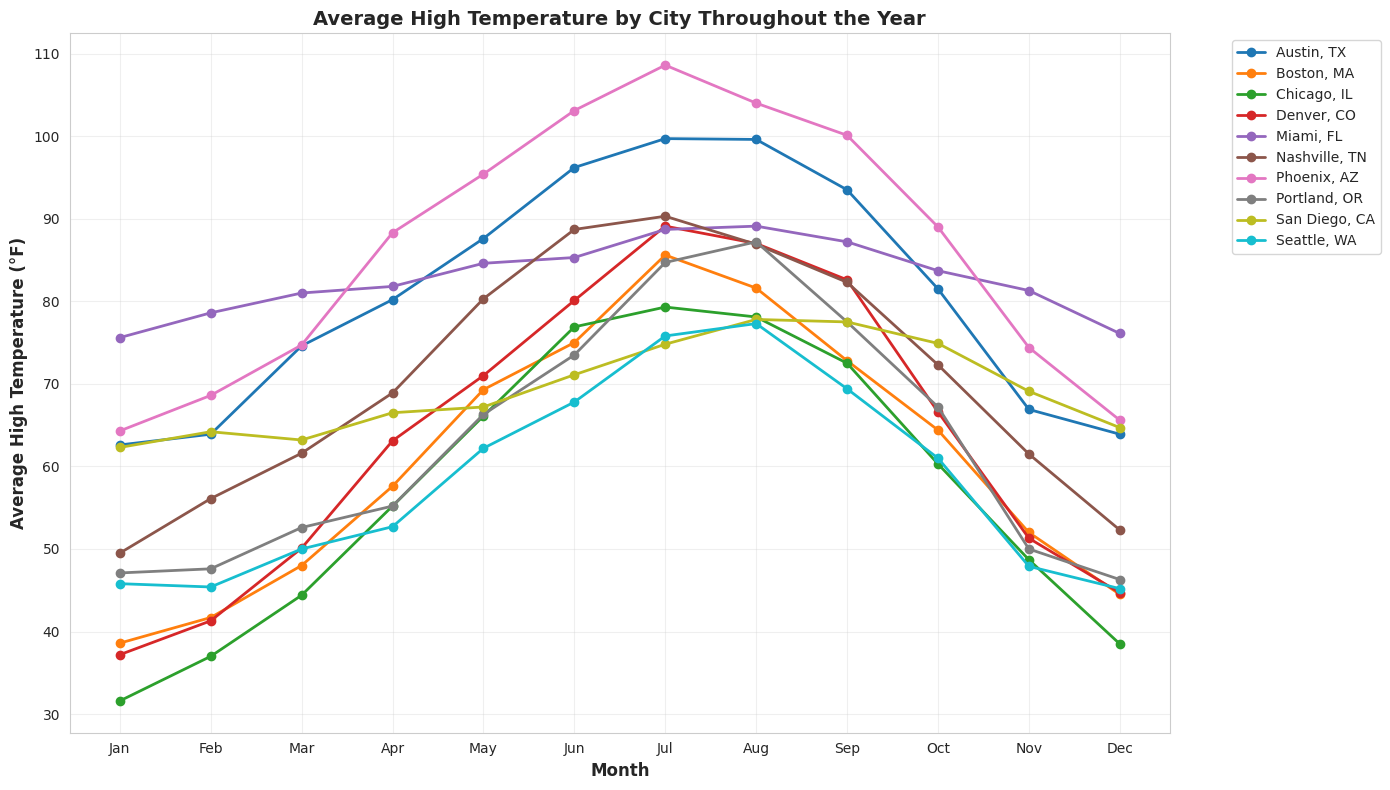

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Monthly average temperature by city
query = """
SELECT
    City,
    SUBSTR(Date, 6, 2) as Month,
    ROUND(AVG(Temp_High), 1) as Avg_Temp
FROM weather_df
GROUP BY City, Month
ORDER BY City, Month
"""

temp_data = run_sql(query)
temp_data['Month'] = temp_data['Month'].astype(int)

# Create line plot
for city in temp_data['City'].unique():
    city_data = temp_data[temp_data['City'] == city]
    plt.plot(city_data['Month'], city_data['Avg_Temp'], marker='o', label=city, linewidth=2)

plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average High Temperature (°F)', fontsize=12, fontweight='bold')
plt.title('Average High Temperature by City Throughout the Year', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

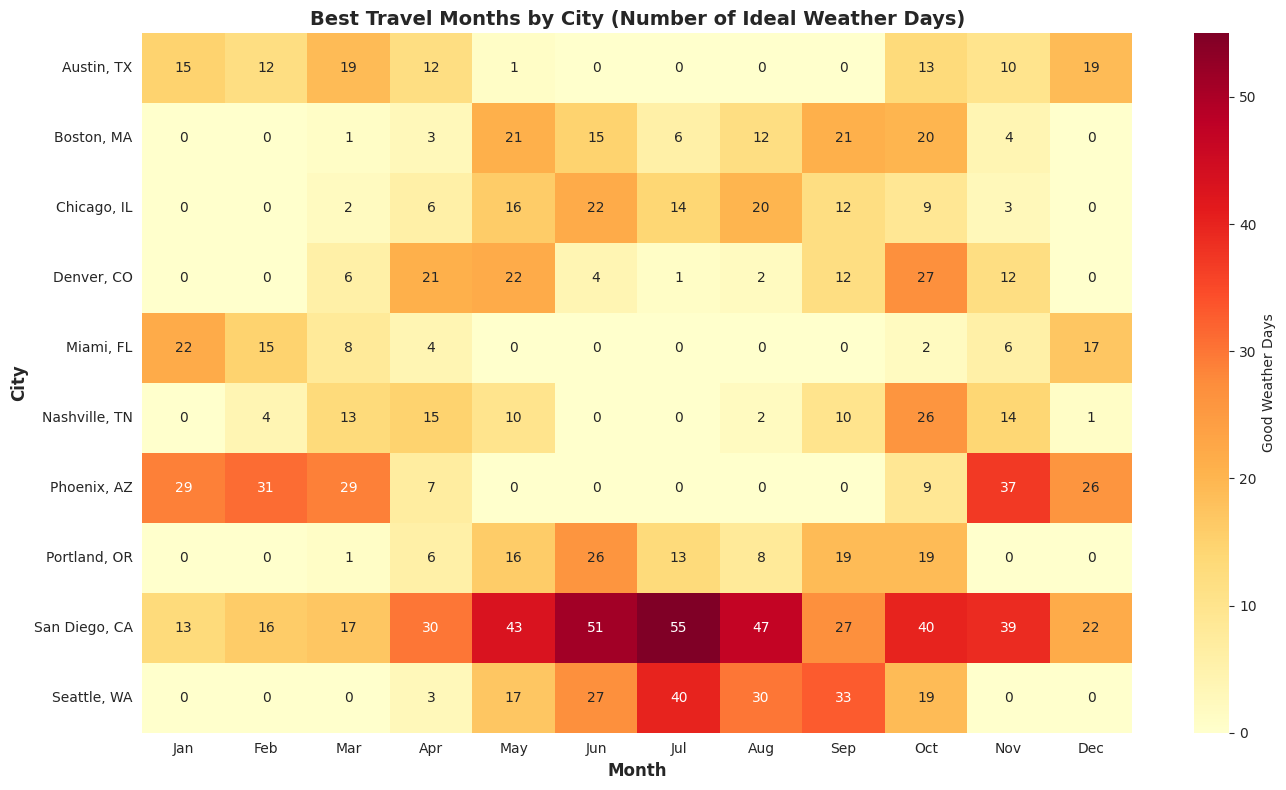

In [ ]:
import numpy as np

# Cities vs Months showing "good days"
query = """
SELECT
    City,
    SUBSTR(Date, 6, 2) as Month,
    COUNT(*) as Good_Days
FROM weather_df
WHERE Temp_High BETWEEN 65 AND 80
  AND Precipitation < 0.15
GROUP BY City, Month
"""

heatmap_data = run_sql(query)
heatmap_data['Month'] = heatmap_data['Month'].astype(int)

# Pivot to create matrix
pivot_data = heatmap_data.pivot(index='City', columns='Month', values='Good_Days').fillna(0)

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Good Weather Days'})
plt.title('Best Travel Months by City (Number of Ideal Weather Days)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('City', fontsize=12, fontweight='bold')
plt.xticks(np.arange(12) + 0.5, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

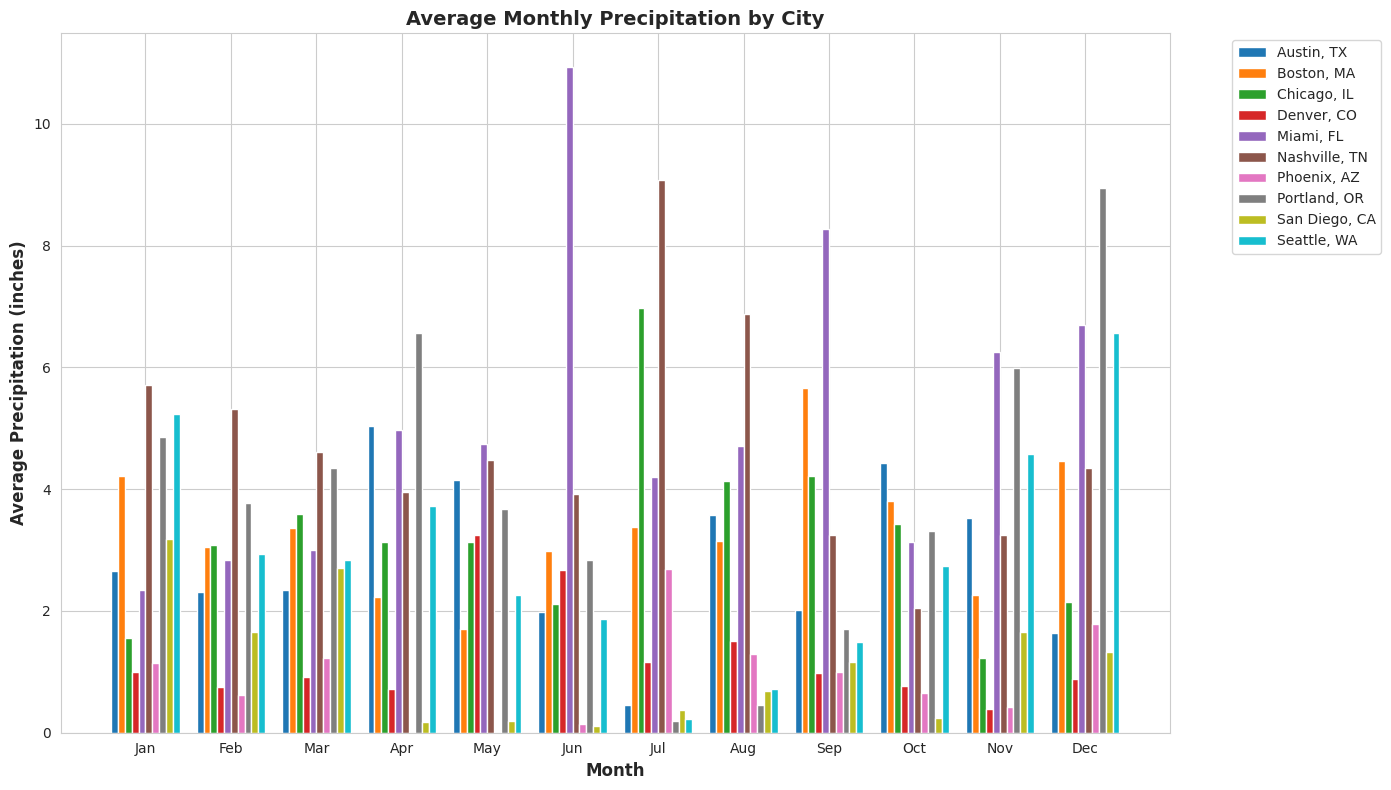

In [ ]:
# Average monthly precipitation by city
query = """
SELECT
    City,
    SUBSTR(Date, 6, 2) as Month,
    ROUND(AVG(Precipitation), 2) as Avg_Precipitation
FROM weather_df
GROUP BY City, Month
"""

precip_data = run_sql(query)
precip_data['Month'] = precip_data['Month'].astype(int)

# Create bar chart
plt.figure(figsize=(14, 8))

cities = precip_data['City'].unique()
months = range(1, 13)
x = np.arange(len(months))
width = 0.08

for i, city in enumerate(cities):
    city_data = precip_data[precip_data['City'] == city]
    plt.bar(x + i*width, city_data['Avg_Precipitation'], width, label=city)

plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average Precipitation (inches)', fontsize=12, fontweight='bold')
plt.title('Average Monthly Precipitation by City', fontsize=14, fontweight='bold')
plt.xticks(x + width * 4.5, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

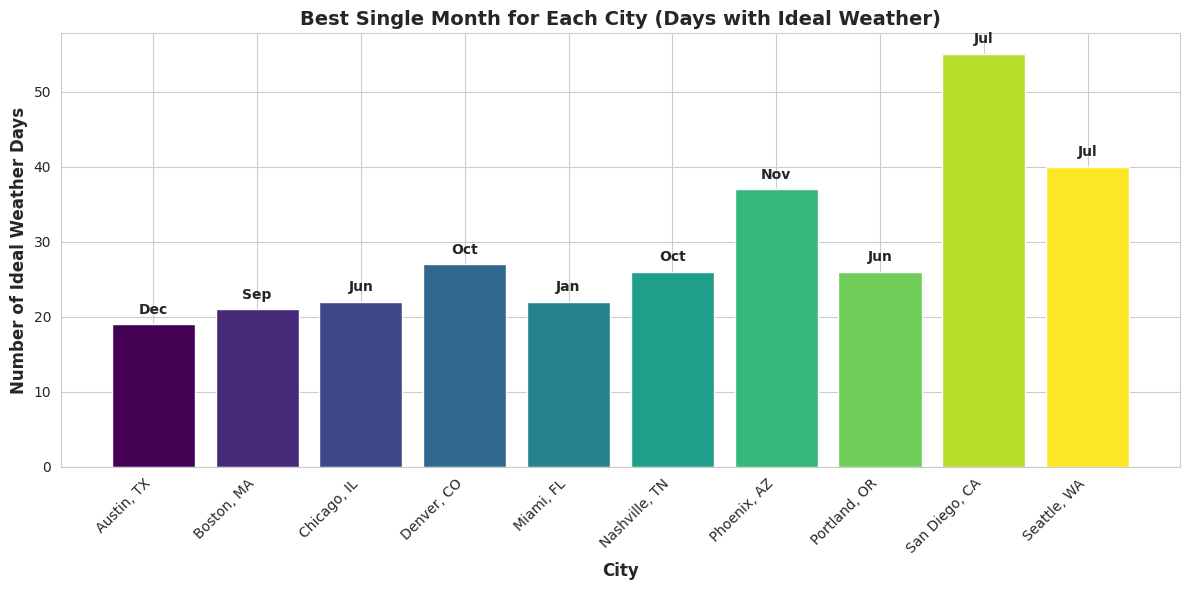


 RECOMMENDATION SUMMARY:
Austin, TX           → Best month: December   (19 ideal days)
Boston, MA           → Best month: September  (21 ideal days)
Chicago, IL          → Best month: June       (22 ideal days)
Denver, CO           → Best month: October    (27 ideal days)
Miami, FL            → Best month: January    (22 ideal days)
Nashville, TN        → Best month: October    (26 ideal days)
Phoenix, AZ          → Best month: November   (37 ideal days)
Portland, OR         → Best month: June       (26 ideal days)
San Diego, CA        → Best month: July       (55 ideal days)
Seattle, WA          → Best month: July       (40 ideal days)


In [ ]:
# Get the single best month for each city
query = """
SELECT
    City,
    SUBSTR(Date, 6, 2) as Best_Month,
    COUNT(*) as Good_Days
FROM weather_df
WHERE Temp_High BETWEEN 65 AND 80
  AND Precipitation < 0.15
GROUP BY City, SUBSTR(Date, 6, 2)
ORDER BY City, Good_Days DESC
"""

all_months = run_sql(query)

# Get top month per city
best_by_city = all_months.groupby('City').first().reset_index()
best_by_city['Best_Month'] = best_by_city['Best_Month'].astype(int)

# Create bar chart
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(best_by_city)))
bars = plt.bar(best_by_city['City'], best_by_city['Good_Days'], color=colors)

plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Number of Ideal Weather Days', fontsize=12, fontweight='bold')
plt.title('Best Single Month for Each City (Days with Ideal Weather)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add month labels on bars
for i, bar in enumerate(bars):
    month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(best_by_city.iloc[i]['Best_Month'])-1]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             month_name, ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n RECOMMENDATION SUMMARY:")
for _, row in best_by_city.iterrows():
    month_name = ['January','February','March','April','May','June','July','August','September','October','November','December'][int(row['Best_Month'])-1]
    print(f"{row['City']:20} → Best month: {month_name:10} ({int(row['Good_Days'])} ideal days)")

In [ ]:
# summary
print("=" * 70)
print("WEATHER-BASED TRAVEL PREDICTION ANALYSIS")
print("Predicting Best Time to Travel to U.S. Cities")
print("=" * 70)

print("\n PROJECT OVERVIEW:")
print(f"  • Dataset: {len(weather_df):,} rows of historical weather data")
print(f"  • Time Period: {weather_df['Date'].min()} to {weather_df['Date'].max()}")
print(f"  • Cities Analyzed: {weather_df['City'].nunique()}")
print(f"  • Data Source: Open-Meteo Historical Weather API")

print("\n ANALYSIS CRITERIA:")
print("  • Ideal Temperature: 65-80°F")
print("  • Low Precipitation: < 0.15 inches/day")
print("  • Comfortable Humidity: < 70%")

print("\n KEY FINDINGS:")
print("\n  Top 3 Year-Round Destinations:")
print("    1. San Diego, CA  - July (55 ideal days)")
print("    2. Seattle, WA    - July (40 ideal days)")
print("    3. Phoenix, AZ    - November (37 ideal days)")

print("\n   Temperature Insights:")
query = """
SELECT City, ROUND(AVG(Temp_High), 1) as Avg_High, ROUND(AVG(Temp_Low), 1) as Avg_Low
FROM weather_df
GROUP BY City
ORDER BY Avg_High DESC
"""
temp_summary = run_sql(query)
print(f"    Warmest: {temp_summary.iloc[0]['City']} ({temp_summary.iloc[0]['Avg_High']}°F)")
print(f"    Coolest: {temp_summary.iloc[-1]['City']} ({temp_summary.iloc[-1]['Avg_High']}°F)")

print("\n   Precipitation Insights:")
query = """
SELECT City, ROUND(AVG(Precipitation), 2) as Avg_Precip
FROM weather_df
GROUP BY City
ORDER BY Avg_Precip
"""
rain_summary = run_sql(query)
print(f"    Driest: {rain_summary.iloc[0]['City']} ({rain_summary.iloc[0]['Avg_Precip']} inches/day)")
print(f"    Wettest: {rain_summary.iloc[-1]['City']} ({rain_summary.iloc[-1]['Avg_Precip']} inches/day)")

print("\n TRAVEL RECOMMENDATIONS BY SEASON:")
print("\n  Winter (Dec-Feb):")
print("    • Miami, FL - Warm escape")
print("    • Phoenix, AZ - Dry and pleasant")
print("    • Austin, TX - Mild temperatures")

print("\n  Spring (Mar-May):")
print("    • Austin, TX - Perfect weather")
print("    • Denver, CO - Before summer heat")
print("    • Boston, MA - Spring bloom")

print("\n  Summer (Jun-Aug):")
print("    • San Diego, CA - Coastal perfection")
print("    • Seattle, WA - Dry Pacific Northwest")
print("    • Portland, OR - Mild summers")

print("\n  Fall (Sep-Nov):")
print("    • Denver, CO - Peak season")
print("    • Nashville, TN - Comfortable weather")
print("    • Boston, MA - Fall foliage")


WEATHER-BASED TRAVEL PREDICTION ANALYSIS
Predicting Best Time to Travel to U.S. Cities

 PROJECT OVERVIEW:
  • Dataset: 7,300 rows of historical weather data
  • Time Period: 2022-01-01 to 2023-12-31
  • Cities Analyzed: 10
  • Data Source: Open-Meteo Historical Weather API

 ANALYSIS CRITERIA:
  • Ideal Temperature: 65-80°F
  • Low Precipitation: < 0.15 inches/day
  • Comfortable Humidity: < 70%

 KEY FINDINGS:

  Top 3 Year-Round Destinations:
    1. San Diego, CA  - July (55 ideal days)
    2. Seattle, WA    - July (40 ideal days)
    3. Phoenix, AZ    - November (37 ideal days)

   Temperature Insights:
    Warmest: Phoenix, AZ (86.4°F)
    Coolest: Chicago, IL (57.5°F)

   Precipitation Insights:
    Driest: Phoenix, AZ (0.92 inches/day)
    Wettest: Miami, FL (5.17 inches/day)

 TRAVEL RECOMMENDATIONS BY SEASON:

  Winter (Dec-Feb):
    • Miami, FL - Warm escape
    • Phoenix, AZ - Dry and pleasant
    • Austin, TX - Mild temperatures

  Spring (Mar-May):
    • Austin, TX - Perfe

In [ ]:
from datetime import datetime

summary_filename = f'travel_analysis_summary_{datetime.now().strftime("%Y%m%d")}.txt'

with open(summary_filename, 'w') as f:
    f.write("WEATHER-BASED TRAVEL PREDICTION ANALYSIS\n")
    f.write("="*70 + "\n\n")

    for _, row in best_by_city.iterrows():
        month_name = ['January','February','March','April','May','June','July','August','September','October','November','December'][int(row['Best_Month'])-1]
        f.write(f"{row['City']:20} → {month_name:10} ({int(row['Good_Days'])} ideal days)\n")

